# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|████████████████████████████████████████████████████████| 60.0K/60.0K [00:51<00:00, 1.17KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

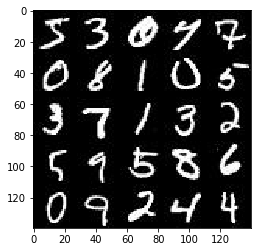

In [1]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
import helper
data_dir = './data'

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

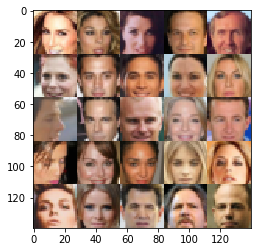

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [4]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None,z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [5]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('discriminator',reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2,padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2,padding='same')
        batch_norm = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * batch_norm, batch_norm)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2,padding='same')
        batch_norm2 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [6]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    if is_train:
        reuse = False
    else:
        reuse = True
    
    with tf.variable_scope('generator',reuse=reuse):
        alpha = 0.2
        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        bn1 = tf.layers.batch_normalization(x1, training=is_train)
        relu1 = tf.maximum(alpha * bn1, bn1)
        #4X4x512
        
        x2 = tf.layers.conv2d_transpose(relu1, 256, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = tf.maximum(alpha * bn2,bn2)
        #8X8x256
        
        x3 = tf.layers.conv2d_transpose(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = tf.maximum(alpha * bn3,bn3)
        #16X16x128
        
        #x4 = tf.layers.conv2d_transpose(relu3, 64, 5, strides=2, padding='same')
        #bn4 = tf.layers.batch_normalization(x4, training=is_train)
        #relu4 = tf.maximum(alpha * bn4,bn4)
        #32X32x64
        
        # Output layer
        x4 = tf.layers.conv2d_transpose(x3, out_channel_dim, 13, strides=1, padding='valid')
        # 28x28xout_channel_dim now
        #logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=1, padding='valid')
        #logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=2, padding='valid')
        
        out = tf.tanh(x4)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [7]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.2
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [8]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [10]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    print("data_shape : ",data_shape)
    # TODO: Build Model
    print_every = 10
    show_every=100
    out_channel_dim = data_shape[3]
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    samples, losses = [], []
    steps = 0
    input_real, input_z, lr = model_inputs(data_shape[2], data_shape[1], data_shape[3], z_dim)
    print("out_channel_dim shape: ",out_channel_dim)
    print("input_real shape: ",input_real.shape)
    
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                # TODO: Train Model                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z,lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                if steps % show_every == 0:
                    show_generator_output(sess,3,input_z, out_channel_dim, data_image_mode)
                    #sess.run(show_generator_output(sess,3,input_z, out_channel_dim, data_image_mode),
                                  # feed_dict={input_z: sample_z})
        saver.save(sess, './checkpoints/generator.ckpt')
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

data_shape :  (60000, 28, 28, 1)
out_channel_dim shape:  1
input_real shape:  (?, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 2.0182... Generator Loss: 0.4829
Epoch 1/2... Discriminator Loss: 1.9381... Generator Loss: 0.4196
Epoch 1/2... Discriminator Loss: 1.9567... Generator Loss: 0.4078
Epoch 1/2... Discriminator Loss: 1.9834... Generator Loss: 0.3151
Epoch 1/2... Discriminator Loss: 1.9521... Generator Loss: 0.3963
Epoch 1/2... Discriminator Loss: 2.0130... Generator Loss: 0.3723
Epoch 1/2... Discriminator Loss: 1.9678... Generator Loss: 0.3365
Epoch 1/2... Discriminator Loss: 1.9995... Generator Loss: 0.3183
Epoch 1/2... Discriminator Loss: 2.0269... Generator Loss: 0.3119
Epoch 1/2... Discriminator Loss: 1.9683... Generator Loss: 0.3201


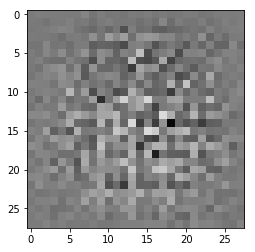

Epoch 1/2... Discriminator Loss: 1.6993... Generator Loss: 0.4250
Epoch 1/2... Discriminator Loss: 1.6922... Generator Loss: 0.3533
Epoch 1/2... Discriminator Loss: 1.6797... Generator Loss: 0.4108
Epoch 1/2... Discriminator Loss: 1.6673... Generator Loss: 0.3804
Epoch 1/2... Discriminator Loss: 1.6950... Generator Loss: 0.3649
Epoch 1/2... Discriminator Loss: 1.7010... Generator Loss: 0.3742
Epoch 1/2... Discriminator Loss: 1.6958... Generator Loss: 0.3848
Epoch 1/2... Discriminator Loss: 1.7589... Generator Loss: 0.3414
Epoch 1/2... Discriminator Loss: 1.5874... Generator Loss: 0.4095
Epoch 1/2... Discriminator Loss: 1.5481... Generator Loss: 0.3967


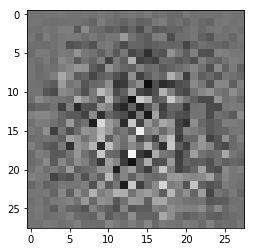

Epoch 1/2... Discriminator Loss: 1.5628... Generator Loss: 0.4029
Epoch 1/2... Discriminator Loss: 1.4544... Generator Loss: 0.4633
Epoch 1/2... Discriminator Loss: 1.3768... Generator Loss: 0.4964
Epoch 1/2... Discriminator Loss: 1.3264... Generator Loss: 0.4984
Epoch 1/2... Discriminator Loss: 1.3035... Generator Loss: 0.4983
Epoch 1/2... Discriminator Loss: 1.2970... Generator Loss: 0.5126
Epoch 1/2... Discriminator Loss: 1.3800... Generator Loss: 0.5479
Epoch 1/2... Discriminator Loss: 1.2132... Generator Loss: 0.5856
Epoch 1/2... Discriminator Loss: 1.2254... Generator Loss: 0.5405
Epoch 1/2... Discriminator Loss: 1.1822... Generator Loss: 0.6115


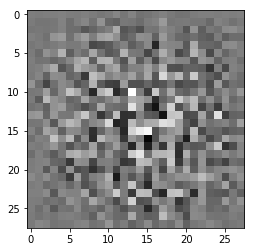

Epoch 1/2... Discriminator Loss: 1.1348... Generator Loss: 0.6193
Epoch 1/2... Discriminator Loss: 1.1159... Generator Loss: 0.6134
Epoch 1/2... Discriminator Loss: 1.0257... Generator Loss: 0.6498
Epoch 1/2... Discriminator Loss: 1.0785... Generator Loss: 0.6721
Epoch 1/2... Discriminator Loss: 1.0905... Generator Loss: 0.6656
Epoch 1/2... Discriminator Loss: 1.0359... Generator Loss: 0.6655
Epoch 1/2... Discriminator Loss: 1.1862... Generator Loss: 0.5989
Epoch 1/2... Discriminator Loss: 1.1399... Generator Loss: 0.6268
Epoch 1/2... Discriminator Loss: 1.1090... Generator Loss: 0.6658
Epoch 1/2... Discriminator Loss: 1.0587... Generator Loss: 0.6636


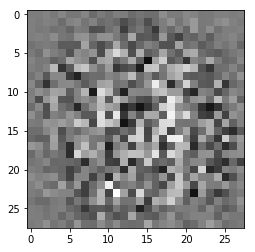

Epoch 1/2... Discriminator Loss: 1.1141... Generator Loss: 0.6627
Epoch 1/2... Discriminator Loss: 1.1413... Generator Loss: 0.6271
Epoch 1/2... Discriminator Loss: 1.0841... Generator Loss: 0.6649
Epoch 1/2... Discriminator Loss: 1.0751... Generator Loss: 0.6857
Epoch 1/2... Discriminator Loss: 1.1113... Generator Loss: 0.7077
Epoch 1/2... Discriminator Loss: 1.0510... Generator Loss: 0.6905
Epoch 1/2... Discriminator Loss: 0.9894... Generator Loss: 0.7930
Epoch 1/2... Discriminator Loss: 0.9224... Generator Loss: 0.8574
Epoch 1/2... Discriminator Loss: 0.9031... Generator Loss: 0.8268
Epoch 1/2... Discriminator Loss: 1.0478... Generator Loss: 0.8026


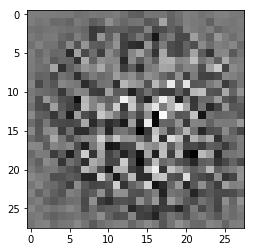

Epoch 1/2... Discriminator Loss: 0.9067... Generator Loss: 0.8872
Epoch 1/2... Discriminator Loss: 0.9147... Generator Loss: 0.8633
Epoch 1/2... Discriminator Loss: 0.8691... Generator Loss: 0.8492
Epoch 1/2... Discriminator Loss: 0.8569... Generator Loss: 0.8522
Epoch 1/2... Discriminator Loss: 0.8924... Generator Loss: 0.8700
Epoch 1/2... Discriminator Loss: 0.7841... Generator Loss: 0.9791
Epoch 1/2... Discriminator Loss: 0.7808... Generator Loss: 1.0181
Epoch 1/2... Discriminator Loss: 0.8891... Generator Loss: 0.8864
Epoch 1/2... Discriminator Loss: 0.7455... Generator Loss: 1.0024
Epoch 1/2... Discriminator Loss: 0.7198... Generator Loss: 0.9970


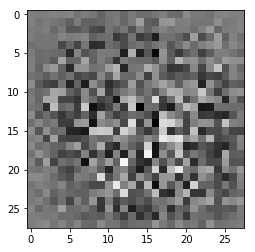

Epoch 1/2... Discriminator Loss: 0.7981... Generator Loss: 1.0077
Epoch 1/2... Discriminator Loss: 0.8370... Generator Loss: 0.9230
Epoch 1/2... Discriminator Loss: 0.8573... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 0.7620... Generator Loss: 1.0118
Epoch 1/2... Discriminator Loss: 0.8026... Generator Loss: 1.0195
Epoch 1/2... Discriminator Loss: 0.7392... Generator Loss: 1.0219
Epoch 1/2... Discriminator Loss: 0.7314... Generator Loss: 1.0289
Epoch 1/2... Discriminator Loss: 0.8813... Generator Loss: 0.9274
Epoch 1/2... Discriminator Loss: 0.8456... Generator Loss: 0.9226
Epoch 1/2... Discriminator Loss: 0.8715... Generator Loss: 0.9360


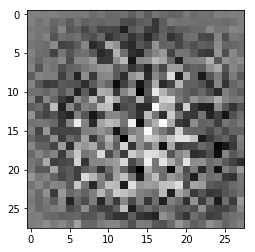

Epoch 1/2... Discriminator Loss: 0.8080... Generator Loss: 0.9641
Epoch 1/2... Discriminator Loss: 0.8750... Generator Loss: 1.0225
Epoch 1/2... Discriminator Loss: 0.7375... Generator Loss: 1.0241
Epoch 1/2... Discriminator Loss: 0.7632... Generator Loss: 1.0447
Epoch 1/2... Discriminator Loss: 0.7050... Generator Loss: 1.0515
Epoch 1/2... Discriminator Loss: 0.7930... Generator Loss: 1.0437
Epoch 1/2... Discriminator Loss: 0.7242... Generator Loss: 1.0479
Epoch 1/2... Discriminator Loss: 0.7217... Generator Loss: 1.0988
Epoch 1/2... Discriminator Loss: 0.6505... Generator Loss: 1.2340
Epoch 1/2... Discriminator Loss: 0.6313... Generator Loss: 1.2104


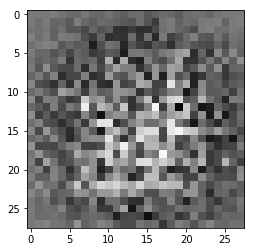

Epoch 1/2... Discriminator Loss: 0.6573... Generator Loss: 1.2373
Epoch 1/2... Discriminator Loss: 0.7085... Generator Loss: 1.1612
Epoch 1/2... Discriminator Loss: 0.6449... Generator Loss: 1.1672
Epoch 1/2... Discriminator Loss: 0.7513... Generator Loss: 1.0943
Epoch 1/2... Discriminator Loss: 0.7297... Generator Loss: 1.0892
Epoch 1/2... Discriminator Loss: 0.6756... Generator Loss: 1.2049
Epoch 1/2... Discriminator Loss: 0.8172... Generator Loss: 1.0325
Epoch 1/2... Discriminator Loss: 0.7515... Generator Loss: 1.1319
Epoch 1/2... Discriminator Loss: 0.6175... Generator Loss: 1.1232
Epoch 1/2... Discriminator Loss: 0.7000... Generator Loss: 1.1169


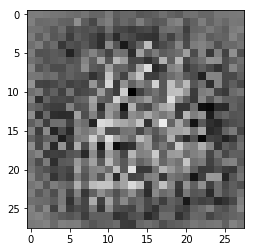

Epoch 1/2... Discriminator Loss: 0.7019... Generator Loss: 1.1064
Epoch 1/2... Discriminator Loss: 0.8006... Generator Loss: 1.0353
Epoch 1/2... Discriminator Loss: 0.7782... Generator Loss: 1.0589
Epoch 1/2... Discriminator Loss: 0.7894... Generator Loss: 0.9830
Epoch 1/2... Discriminator Loss: 0.7189... Generator Loss: 1.1035
Epoch 1/2... Discriminator Loss: 0.7520... Generator Loss: 1.0513
Epoch 1/2... Discriminator Loss: 0.7792... Generator Loss: 1.1027
Epoch 1/2... Discriminator Loss: 0.7385... Generator Loss: 1.1231
Epoch 1/2... Discriminator Loss: 0.7253... Generator Loss: 1.0775
Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 1.0377


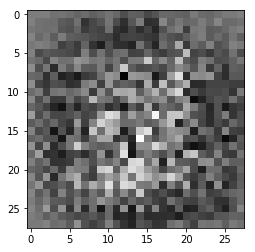

Epoch 1/2... Discriminator Loss: 0.6749... Generator Loss: 1.1730
Epoch 1/2... Discriminator Loss: 0.6879... Generator Loss: 1.1305
Epoch 1/2... Discriminator Loss: 0.7253... Generator Loss: 1.0197
Epoch 1/2... Discriminator Loss: 0.8533... Generator Loss: 1.0150
Epoch 1/2... Discriminator Loss: 0.8092... Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 0.7705... Generator Loss: 1.0615
Epoch 1/2... Discriminator Loss: 0.7674... Generator Loss: 1.0037
Epoch 1/2... Discriminator Loss: 0.7550... Generator Loss: 1.1251
Epoch 1/2... Discriminator Loss: 0.6883... Generator Loss: 1.1144
Epoch 1/2... Discriminator Loss: 0.8237... Generator Loss: 1.0587


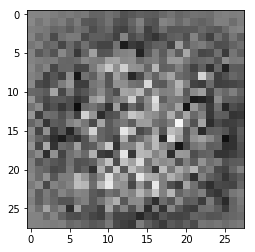

Epoch 1/2... Discriminator Loss: 0.9146... Generator Loss: 1.0706
Epoch 1/2... Discriminator Loss: 0.7240... Generator Loss: 1.0440
Epoch 1/2... Discriminator Loss: 0.7868... Generator Loss: 1.0177
Epoch 1/2... Discriminator Loss: 0.8206... Generator Loss: 1.0873
Epoch 1/2... Discriminator Loss: 0.8098... Generator Loss: 1.0417
Epoch 1/2... Discriminator Loss: 0.6945... Generator Loss: 1.0681
Epoch 1/2... Discriminator Loss: 0.8929... Generator Loss: 0.9990
Epoch 1/2... Discriminator Loss: 0.8375... Generator Loss: 0.9909
Epoch 1/2... Discriminator Loss: 0.8219... Generator Loss: 1.1080
Epoch 1/2... Discriminator Loss: 0.9316... Generator Loss: 0.9631


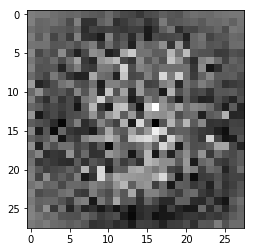

Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 1.0239
Epoch 2/2... Discriminator Loss: 0.8606... Generator Loss: 0.9644
Epoch 2/2... Discriminator Loss: 0.8377... Generator Loss: 1.0416
Epoch 2/2... Discriminator Loss: 0.7470... Generator Loss: 1.0763
Epoch 2/2... Discriminator Loss: 0.8200... Generator Loss: 1.1215
Epoch 2/2... Discriminator Loss: 0.8459... Generator Loss: 1.1031
Epoch 2/2... Discriminator Loss: 0.8321... Generator Loss: 1.0916
Epoch 2/2... Discriminator Loss: 0.7955... Generator Loss: 1.0610
Epoch 2/2... Discriminator Loss: 0.8500... Generator Loss: 1.0887
Epoch 2/2... Discriminator Loss: 0.8498... Generator Loss: 1.1204


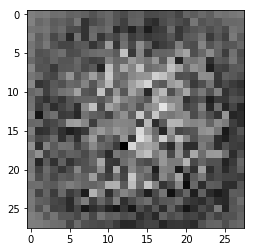

Epoch 2/2... Discriminator Loss: 0.7390... Generator Loss: 1.1498
Epoch 2/2... Discriminator Loss: 0.7832... Generator Loss: 1.1184
Epoch 2/2... Discriminator Loss: 0.8724... Generator Loss: 1.1226
Epoch 2/2... Discriminator Loss: 0.7417... Generator Loss: 1.1552
Epoch 2/2... Discriminator Loss: 0.7386... Generator Loss: 1.1583
Epoch 2/2... Discriminator Loss: 0.9305... Generator Loss: 1.0326
Epoch 2/2... Discriminator Loss: 0.7965... Generator Loss: 1.1539
Epoch 2/2... Discriminator Loss: 0.7439... Generator Loss: 1.1725
Epoch 2/2... Discriminator Loss: 0.7346... Generator Loss: 1.1879
Epoch 2/2... Discriminator Loss: 0.8226... Generator Loss: 1.1363


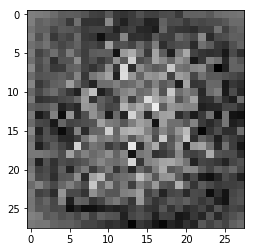

Epoch 2/2... Discriminator Loss: 0.7999... Generator Loss: 1.1511
Epoch 2/2... Discriminator Loss: 0.8864... Generator Loss: 1.0046
Epoch 2/2... Discriminator Loss: 0.7396... Generator Loss: 1.1970
Epoch 2/2... Discriminator Loss: 0.8104... Generator Loss: 1.0629
Epoch 2/2... Discriminator Loss: 0.7719... Generator Loss: 1.1171
Epoch 2/2... Discriminator Loss: 0.7028... Generator Loss: 1.1805
Epoch 2/2... Discriminator Loss: 0.9301... Generator Loss: 1.1834
Epoch 2/2... Discriminator Loss: 0.9474... Generator Loss: 1.0184
Epoch 2/2... Discriminator Loss: 0.9532... Generator Loss: 0.9911
Epoch 2/2... Discriminator Loss: 0.8909... Generator Loss: 1.0591


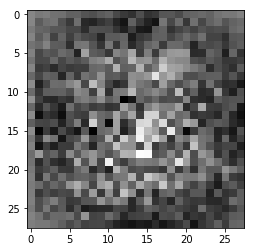

Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 1.0537
Epoch 2/2... Discriminator Loss: 0.8272... Generator Loss: 1.0763
Epoch 2/2... Discriminator Loss: 0.7352... Generator Loss: 1.1265
Epoch 2/2... Discriminator Loss: 0.8611... Generator Loss: 1.0594
Epoch 2/2... Discriminator Loss: 0.8639... Generator Loss: 1.1203
Epoch 2/2... Discriminator Loss: 0.6859... Generator Loss: 1.1548
Epoch 2/2... Discriminator Loss: 0.8409... Generator Loss: 1.1118
Epoch 2/2... Discriminator Loss: 0.8595... Generator Loss: 1.1335
Epoch 2/2... Discriminator Loss: 0.8685... Generator Loss: 1.0820
Epoch 2/2... Discriminator Loss: 0.7996... Generator Loss: 1.0938


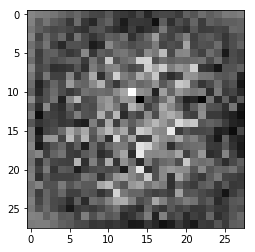

Epoch 2/2... Discriminator Loss: 0.7935... Generator Loss: 1.0747
Epoch 2/2... Discriminator Loss: 0.8996... Generator Loss: 1.1467
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 1.0651
Epoch 2/2... Discriminator Loss: 0.7945... Generator Loss: 1.1453
Epoch 2/2... Discriminator Loss: 0.8757... Generator Loss: 1.0807
Epoch 2/2... Discriminator Loss: 0.8331... Generator Loss: 1.1669
Epoch 2/2... Discriminator Loss: 0.8157... Generator Loss: 1.1186
Epoch 2/2... Discriminator Loss: 0.8416... Generator Loss: 1.1162
Epoch 2/2... Discriminator Loss: 0.8332... Generator Loss: 1.0676
Epoch 2/2... Discriminator Loss: 0.9734... Generator Loss: 1.0922


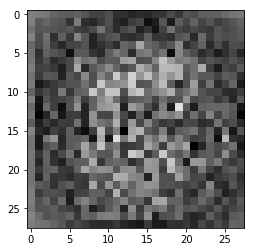

Epoch 2/2... Discriminator Loss: 0.8636... Generator Loss: 1.0747
Epoch 2/2... Discriminator Loss: 0.7799... Generator Loss: 1.1380
Epoch 2/2... Discriminator Loss: 0.7506... Generator Loss: 1.2231
Epoch 2/2... Discriminator Loss: 0.7207... Generator Loss: 1.1837
Epoch 2/2... Discriminator Loss: 0.8370... Generator Loss: 1.1657
Epoch 2/2... Discriminator Loss: 0.8241... Generator Loss: 1.1425
Epoch 2/2... Discriminator Loss: 0.8168... Generator Loss: 1.1375
Epoch 2/2... Discriminator Loss: 0.8363... Generator Loss: 1.1275
Epoch 2/2... Discriminator Loss: 0.7718... Generator Loss: 1.2108
Epoch 2/2... Discriminator Loss: 0.6620... Generator Loss: 1.2329


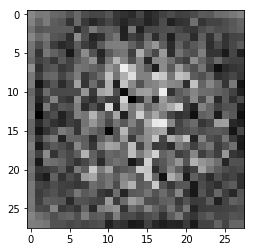

Epoch 2/2... Discriminator Loss: 0.7757... Generator Loss: 1.2104
Epoch 2/2... Discriminator Loss: 0.8015... Generator Loss: 1.1541
Epoch 2/2... Discriminator Loss: 0.7030... Generator Loss: 1.2742
Epoch 2/2... Discriminator Loss: 0.7459... Generator Loss: 1.2778
Epoch 2/2... Discriminator Loss: 0.7753... Generator Loss: 1.2214
Epoch 2/2... Discriminator Loss: 0.7688... Generator Loss: 1.1606
Epoch 2/2... Discriminator Loss: 0.7472... Generator Loss: 1.1731
Epoch 2/2... Discriminator Loss: 0.8258... Generator Loss: 1.2666
Epoch 2/2... Discriminator Loss: 0.7958... Generator Loss: 1.1907
Epoch 2/2... Discriminator Loss: 0.7731... Generator Loss: 1.2247


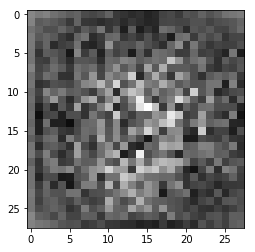

Epoch 2/2... Discriminator Loss: 0.7709... Generator Loss: 1.1896
Epoch 2/2... Discriminator Loss: 0.9546... Generator Loss: 1.1820
Epoch 2/2... Discriminator Loss: 0.7286... Generator Loss: 1.2591
Epoch 2/2... Discriminator Loss: 0.6968... Generator Loss: 1.1891
Epoch 2/2... Discriminator Loss: 0.6021... Generator Loss: 1.3330
Epoch 2/2... Discriminator Loss: 0.8563... Generator Loss: 1.2571
Epoch 2/2... Discriminator Loss: 0.6590... Generator Loss: 1.3051
Epoch 2/2... Discriminator Loss: 0.6802... Generator Loss: 1.3008
Epoch 2/2... Discriminator Loss: 0.7364... Generator Loss: 1.2714
Epoch 2/2... Discriminator Loss: 0.7669... Generator Loss: 1.2335


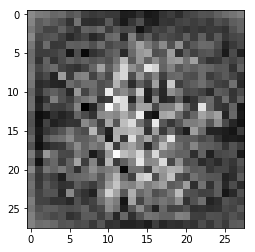

Epoch 2/2... Discriminator Loss: 0.7814... Generator Loss: 1.2727
Epoch 2/2... Discriminator Loss: 0.8741... Generator Loss: 1.1965
Epoch 2/2... Discriminator Loss: 0.6597... Generator Loss: 1.2878
Epoch 2/2... Discriminator Loss: 0.7972... Generator Loss: 1.1706
Epoch 2/2... Discriminator Loss: 0.8171... Generator Loss: 1.1915
Epoch 2/2... Discriminator Loss: 0.7850... Generator Loss: 1.2101
Epoch 2/2... Discriminator Loss: 0.8840... Generator Loss: 1.2189
Epoch 2/2... Discriminator Loss: 0.8812... Generator Loss: 1.2286
Epoch 2/2... Discriminator Loss: 0.7092... Generator Loss: 1.1423
Epoch 2/2... Discriminator Loss: 0.7805... Generator Loss: 1.1436


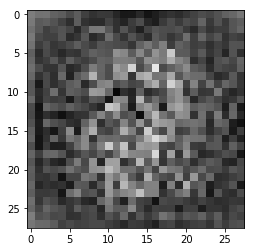

Epoch 2/2... Discriminator Loss: 0.7271... Generator Loss: 1.2421
Epoch 2/2... Discriminator Loss: 0.7824... Generator Loss: 1.2283
Epoch 2/2... Discriminator Loss: 0.7633... Generator Loss: 1.2809
Epoch 2/2... Discriminator Loss: 0.7898... Generator Loss: 1.1675
Epoch 2/2... Discriminator Loss: 0.7781... Generator Loss: 1.1437
Epoch 2/2... Discriminator Loss: 0.7679... Generator Loss: 1.1536
Epoch 2/2... Discriminator Loss: 0.8946... Generator Loss: 1.1462
Epoch 2/2... Discriminator Loss: 0.8554... Generator Loss: 1.1580
Epoch 2/2... Discriminator Loss: 0.8151... Generator Loss: 1.0860
Epoch 2/2... Discriminator Loss: 0.9012... Generator Loss: 1.1349


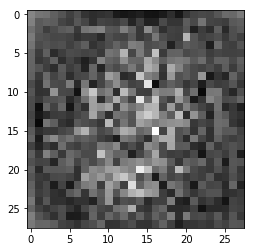

Epoch 2/2... Discriminator Loss: 0.8025... Generator Loss: 1.0818
Epoch 2/2... Discriminator Loss: 0.8527... Generator Loss: 1.1220
Epoch 2/2... Discriminator Loss: 0.7892... Generator Loss: 1.0848
Epoch 2/2... Discriminator Loss: 0.8531... Generator Loss: 1.1440
Epoch 2/2... Discriminator Loss: 0.9598... Generator Loss: 1.0404
Epoch 2/2... Discriminator Loss: 0.8375... Generator Loss: 1.1076
Epoch 2/2... Discriminator Loss: 0.8946... Generator Loss: 0.9855
Epoch 2/2... Discriminator Loss: 0.9014... Generator Loss: 1.0724
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.0649
Epoch 2/2... Discriminator Loss: 0.8857... Generator Loss: 1.1258


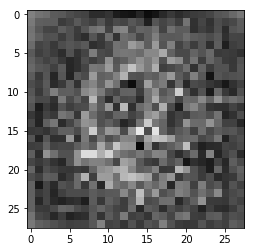

Epoch 2/2... Discriminator Loss: 1.0910... Generator Loss: 1.0025
Epoch 2/2... Discriminator Loss: 0.7712... Generator Loss: 1.1052
Epoch 2/2... Discriminator Loss: 0.9598... Generator Loss: 1.0226
Epoch 2/2... Discriminator Loss: 1.0111... Generator Loss: 1.0372
Epoch 2/2... Discriminator Loss: 0.8772... Generator Loss: 1.0324
Epoch 2/2... Discriminator Loss: 0.8309... Generator Loss: 1.0819
Epoch 2/2... Discriminator Loss: 0.9630... Generator Loss: 1.0284
Epoch 2/2... Discriminator Loss: 0.9401... Generator Loss: 1.0323
Epoch 2/2... Discriminator Loss: 1.0295... Generator Loss: 1.0142
Epoch 2/2... Discriminator Loss: 1.0122... Generator Loss: 0.9907


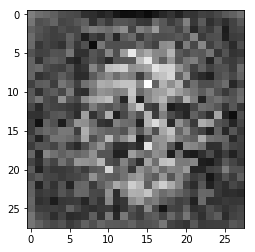

In [33]:
batch_size = 50
z_dim = 100
learning_rate = 0.000001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
tf.reset_default_graph()
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

data_shape :  (202599, 28, 28, 3)
out_channel_dim shape:  3
input_real shape:  (?, 28, 28, 3)
Epoch 1/1... Discriminator Loss: 1.5503... Generator Loss: 0.4502
Epoch 1/1... Discriminator Loss: 0.7314... Generator Loss: 1.4834
Epoch 1/1... Discriminator Loss: 0.5243... Generator Loss: 3.5578
Epoch 1/1... Discriminator Loss: 0.5604... Generator Loss: 4.9932
Epoch 1/1... Discriminator Loss: 0.8842... Generator Loss: 5.7864
Epoch 1/1... Discriminator Loss: 0.4432... Generator Loss: 2.1142
Epoch 1/1... Discriminator Loss: 0.7375... Generator Loss: 5.2617
Epoch 1/1... Discriminator Loss: 0.2863... Generator Loss: 2.3750
Epoch 1/1... Discriminator Loss: 0.3281... Generator Loss: 4.0450
Epoch 1/1... Discriminator Loss: 0.3418... Generator Loss: 1.5619


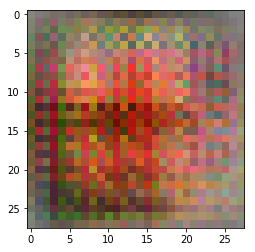

Epoch 1/1... Discriminator Loss: 0.2432... Generator Loss: 2.2751
Epoch 1/1... Discriminator Loss: 0.7680... Generator Loss: 8.2704
Epoch 1/1... Discriminator Loss: 0.4157... Generator Loss: 1.4453
Epoch 1/1... Discriminator Loss: 0.2840... Generator Loss: 1.8096
Epoch 1/1... Discriminator Loss: 0.2844... Generator Loss: 1.6977
Epoch 1/1... Discriminator Loss: 0.2405... Generator Loss: 2.0001
Epoch 1/1... Discriminator Loss: 0.2173... Generator Loss: 4.6390
Epoch 1/1... Discriminator Loss: 0.1995... Generator Loss: 2.5678
Epoch 1/1... Discriminator Loss: 0.2366... Generator Loss: 2.5127
Epoch 1/1... Discriminator Loss: 0.2591... Generator Loss: 2.5219


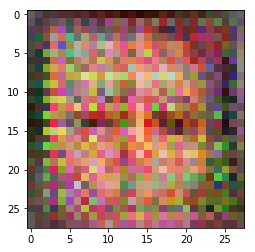

Epoch 1/1... Discriminator Loss: 0.3483... Generator Loss: 1.7513
Epoch 1/1... Discriminator Loss: 0.1580... Generator Loss: 2.6675
Epoch 1/1... Discriminator Loss: 0.2865... Generator Loss: 1.6787
Epoch 1/1... Discriminator Loss: 0.1832... Generator Loss: 2.4797
Epoch 1/1... Discriminator Loss: 0.5058... Generator Loss: 1.0884
Epoch 1/1... Discriminator Loss: 0.2793... Generator Loss: 1.6786
Epoch 1/1... Discriminator Loss: 0.3139... Generator Loss: 1.6426
Epoch 1/1... Discriminator Loss: 0.1340... Generator Loss: 3.0960
Epoch 1/1... Discriminator Loss: 0.1614... Generator Loss: 4.1406
Epoch 1/1... Discriminator Loss: 0.1240... Generator Loss: 3.2104


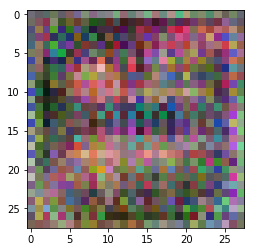

Epoch 1/1... Discriminator Loss: 0.3879... Generator Loss: 1.2787
Epoch 1/1... Discriminator Loss: 0.1211... Generator Loss: 2.8789
Epoch 1/1... Discriminator Loss: 0.0954... Generator Loss: 2.8442
Epoch 1/1... Discriminator Loss: 0.1482... Generator Loss: 2.3822
Epoch 1/1... Discriminator Loss: 0.2259... Generator Loss: 2.0545
Epoch 1/1... Discriminator Loss: 0.2638... Generator Loss: 6.4564
Epoch 1/1... Discriminator Loss: 0.0999... Generator Loss: 2.7420
Epoch 1/1... Discriminator Loss: 0.0996... Generator Loss: 2.7841
Epoch 1/1... Discriminator Loss: 0.0535... Generator Loss: 4.8986
Epoch 1/1... Discriminator Loss: 0.0308... Generator Loss: 6.0153


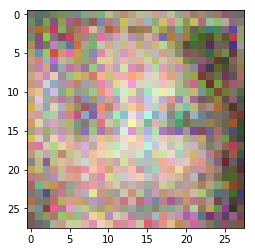

Epoch 1/1... Discriminator Loss: 0.0706... Generator Loss: 3.1693
Epoch 1/1... Discriminator Loss: 3.7882... Generator Loss: 0.2952
Epoch 1/1... Discriminator Loss: 0.0617... Generator Loss: 3.3867
Epoch 1/1... Discriminator Loss: 2.4837... Generator Loss: 0.2348
Epoch 1/1... Discriminator Loss: 0.1395... Generator Loss: 2.5011
Epoch 1/1... Discriminator Loss: 0.1172... Generator Loss: 3.1005
Epoch 1/1... Discriminator Loss: 0.3470... Generator Loss: 1.5770
Epoch 1/1... Discriminator Loss: 1.1910... Generator Loss: 0.4645
Epoch 1/1... Discriminator Loss: 1.1969... Generator Loss: 0.5223
Epoch 1/1... Discriminator Loss: 0.1512... Generator Loss: 2.9696


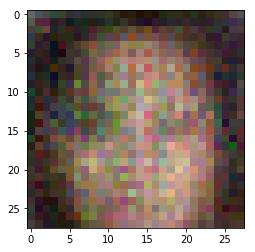

Epoch 1/1... Discriminator Loss: 0.2284... Generator Loss: 2.5191
Epoch 1/1... Discriminator Loss: 2.1568... Generator Loss: 0.1554
Epoch 1/1... Discriminator Loss: 0.5327... Generator Loss: 1.1944
Epoch 1/1... Discriminator Loss: 0.5242... Generator Loss: 1.2080
Epoch 1/1... Discriminator Loss: 2.3106... Generator Loss: 0.1382
Epoch 1/1... Discriminator Loss: 1.6372... Generator Loss: 0.2942
Epoch 1/1... Discriminator Loss: 1.0295... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 0.5680... Generator Loss: 1.2673
Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 2.8333
Epoch 1/1... Discriminator Loss: 0.6311... Generator Loss: 3.3729


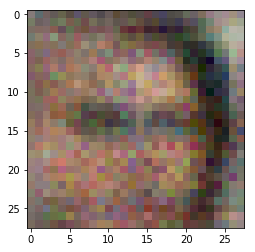

Epoch 1/1... Discriminator Loss: 0.6657... Generator Loss: 2.7533
Epoch 1/1... Discriminator Loss: 0.5933... Generator Loss: 2.1012
Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 2.2798
Epoch 1/1... Discriminator Loss: 0.7902... Generator Loss: 2.4092
Epoch 1/1... Discriminator Loss: 0.4948... Generator Loss: 2.0183
Epoch 1/1... Discriminator Loss: 0.3075... Generator Loss: 2.6022
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 2.7933
Epoch 1/1... Discriminator Loss: 1.1992... Generator Loss: 2.2697
Epoch 1/1... Discriminator Loss: 0.5941... Generator Loss: 1.6369
Epoch 1/1... Discriminator Loss: 0.9563... Generator Loss: 0.6547


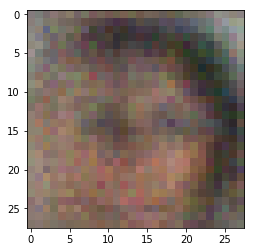

Epoch 1/1... Discriminator Loss: 0.5639... Generator Loss: 1.6379
Epoch 1/1... Discriminator Loss: 0.8781... Generator Loss: 1.7594
Epoch 1/1... Discriminator Loss: 1.5746... Generator Loss: 0.2884
Epoch 1/1... Discriminator Loss: 1.1221... Generator Loss: 0.5038
Epoch 1/1... Discriminator Loss: 0.6796... Generator Loss: 1.0904
Epoch 1/1... Discriminator Loss: 0.5718... Generator Loss: 1.2923
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 0.5257
Epoch 1/1... Discriminator Loss: 0.5690... Generator Loss: 1.1608
Epoch 1/1... Discriminator Loss: 0.9320... Generator Loss: 0.6902
Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 0.4762


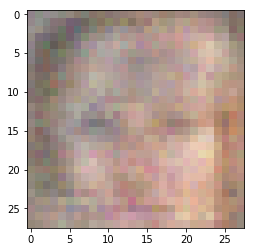

Epoch 1/1... Discriminator Loss: 1.0153... Generator Loss: 0.6387
Epoch 1/1... Discriminator Loss: 0.9053... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 0.6730... Generator Loss: 0.9545
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.4161
Epoch 1/1... Discriminator Loss: 0.7033... Generator Loss: 0.8777
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 0.5535
Epoch 1/1... Discriminator Loss: 0.4562... Generator Loss: 3.2094
Epoch 1/1... Discriminator Loss: 0.3278... Generator Loss: 3.1210
Epoch 1/1... Discriminator Loss: 0.4579... Generator Loss: 3.8893
Epoch 1/1... Discriminator Loss: 0.4418... Generator Loss: 4.2490


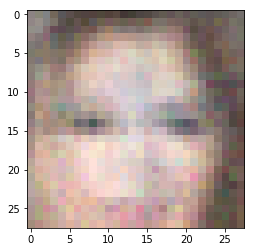

Epoch 1/1... Discriminator Loss: 0.2797... Generator Loss: 2.4552
Epoch 1/1... Discriminator Loss: 0.3659... Generator Loss: 3.1013
Epoch 1/1... Discriminator Loss: 0.7477... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 0.2164... Generator Loss: 3.3739
Epoch 1/1... Discriminator Loss: 0.1932... Generator Loss: 3.6787
Epoch 1/1... Discriminator Loss: 0.5112... Generator Loss: 4.8783
Epoch 1/1... Discriminator Loss: 0.2122... Generator Loss: 4.1645
Epoch 1/1... Discriminator Loss: 0.8459... Generator Loss: 5.9377
Epoch 1/1... Discriminator Loss: 0.8198... Generator Loss: 0.7284
Epoch 1/1... Discriminator Loss: 0.6549... Generator Loss: 0.9325


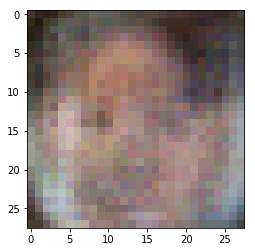

Epoch 1/1... Discriminator Loss: 0.6211... Generator Loss: 1.2424
Epoch 1/1... Discriminator Loss: 0.3262... Generator Loss: 1.7662
Epoch 1/1... Discriminator Loss: 0.2580... Generator Loss: 2.0361
Epoch 1/1... Discriminator Loss: 0.2419... Generator Loss: 3.2099
Epoch 1/1... Discriminator Loss: 0.1562... Generator Loss: 4.7683
Epoch 1/1... Discriminator Loss: 0.4048... Generator Loss: 2.1340
Epoch 1/1... Discriminator Loss: 0.6337... Generator Loss: 0.9687
Epoch 1/1... Discriminator Loss: 0.3068... Generator Loss: 2.2319
Epoch 1/1... Discriminator Loss: 0.4091... Generator Loss: 1.4872
Epoch 1/1... Discriminator Loss: 0.4336... Generator Loss: 1.3951


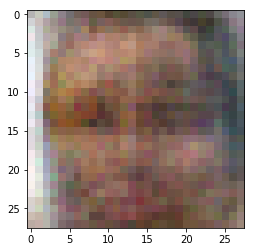

Epoch 1/1... Discriminator Loss: 0.1610... Generator Loss: 5.1971
Epoch 1/1... Discriminator Loss: 0.1442... Generator Loss: 4.5896
Epoch 1/1... Discriminator Loss: 0.1193... Generator Loss: 3.0068
Epoch 1/1... Discriminator Loss: 0.3366... Generator Loss: 1.6074
Epoch 1/1... Discriminator Loss: 0.1997... Generator Loss: 2.2571
Epoch 1/1... Discriminator Loss: 0.0555... Generator Loss: 8.2594
Epoch 1/1... Discriminator Loss: 0.0522... Generator Loss: 5.5304
Epoch 1/1... Discriminator Loss: 0.1888... Generator Loss: 3.4542
Epoch 1/1... Discriminator Loss: 3.9559... Generator Loss: 5.9105
Epoch 1/1... Discriminator Loss: 0.2640... Generator Loss: 2.5561


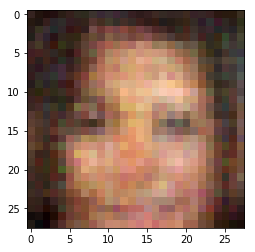

Epoch 1/1... Discriminator Loss: 0.2582... Generator Loss: 2.0862
Epoch 1/1... Discriminator Loss: 0.0335... Generator Loss: 7.9928
Epoch 1/1... Discriminator Loss: 0.0796... Generator Loss: 6.9012
Epoch 1/1... Discriminator Loss: 0.0469... Generator Loss: 9.9868
Epoch 1/1... Discriminator Loss: 0.3595... Generator Loss: 1.5461
Epoch 1/1... Discriminator Loss: 0.2146... Generator Loss: 2.1888
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 8.9753
Epoch 1/1... Discriminator Loss: 0.1047... Generator Loss: 4.1229
Epoch 1/1... Discriminator Loss: 0.1308... Generator Loss: 2.8002
Epoch 1/1... Discriminator Loss: 0.5312... Generator Loss: 3.8669


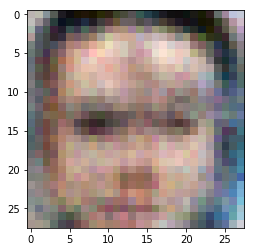

Epoch 1/1... Discriminator Loss: 0.1108... Generator Loss: 6.8537
Epoch 1/1... Discriminator Loss: 0.5669... Generator Loss: 6.5725
Epoch 1/1... Discriminator Loss: 0.0539... Generator Loss: 5.3997
Epoch 1/1... Discriminator Loss: 0.2276... Generator Loss: 2.1360
Epoch 1/1... Discriminator Loss: 0.1676... Generator Loss: 2.8540
Epoch 1/1... Discriminator Loss: 0.5826... Generator Loss: 2.5165
Epoch 1/1... Discriminator Loss: 0.4099... Generator Loss: 1.9409
Epoch 1/1... Discriminator Loss: 0.3081... Generator Loss: 1.9159
Epoch 1/1... Discriminator Loss: 0.0878... Generator Loss: 3.2561
Epoch 1/1... Discriminator Loss: 0.1851... Generator Loss: 2.6924


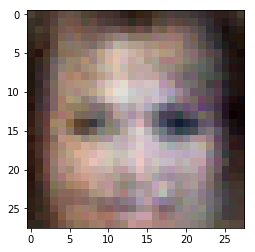

Epoch 1/1... Discriminator Loss: 0.2528... Generator Loss: 1.9892
Epoch 1/1... Discriminator Loss: 0.0403... Generator Loss: 5.5761
Epoch 1/1... Discriminator Loss: 0.2987... Generator Loss: 1.7187
Epoch 1/1... Discriminator Loss: 0.1689... Generator Loss: 2.7406
Epoch 1/1... Discriminator Loss: 0.0784... Generator Loss: 4.0102
Epoch 1/1... Discriminator Loss: 3.4010... Generator Loss: 4.1844
Epoch 1/1... Discriminator Loss: 0.1000... Generator Loss: 4.0398
Epoch 1/1... Discriminator Loss: 0.5306... Generator Loss: 4.2378
Epoch 1/1... Discriminator Loss: 0.0487... Generator Loss: 9.1633
Epoch 1/1... Discriminator Loss: 0.1823... Generator Loss: 2.5291


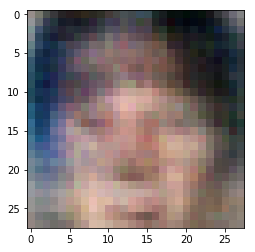

Epoch 1/1... Discriminator Loss: 0.0521... Generator Loss: 8.4943
Epoch 1/1... Discriminator Loss: 0.0999... Generator Loss: 8.0438
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 0.1833... Generator Loss: 2.7429
Epoch 1/1... Discriminator Loss: 0.1164... Generator Loss: 3.1648
Epoch 1/1... Discriminator Loss: 0.0195... Generator Loss: 10.8424
Epoch 1/1... Discriminator Loss: 0.0105... Generator Loss: 6.9925
Epoch 1/1... Discriminator Loss: 0.0984... Generator Loss: 3.7785
Epoch 1/1... Discriminator Loss: 0.0399... Generator Loss: 9.0742
Epoch 1/1... Discriminator Loss: 0.1229... Generator Loss: 3.6826


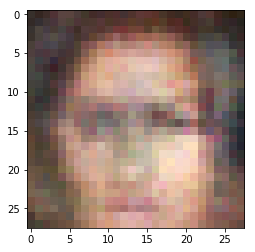

Epoch 1/1... Discriminator Loss: 0.1565... Generator Loss: 2.7392
Epoch 1/1... Discriminator Loss: 0.0549... Generator Loss: 5.1801
Epoch 1/1... Discriminator Loss: 0.5344... Generator Loss: 1.0686
Epoch 1/1... Discriminator Loss: 0.6219... Generator Loss: 5.6797
Epoch 1/1... Discriminator Loss: 0.0822... Generator Loss: 3.9790
Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 3.2853
Epoch 1/1... Discriminator Loss: 0.0886... Generator Loss: 5.6409
Epoch 1/1... Discriminator Loss: 0.5467... Generator Loss: 2.1108
Epoch 1/1... Discriminator Loss: 0.0268... Generator Loss: 9.2955
Epoch 1/1... Discriminator Loss: 0.0807... Generator Loss: 3.9009


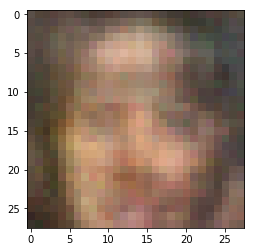

Epoch 1/1... Discriminator Loss: 0.7070... Generator Loss: 0.8589
Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 0.4706
Epoch 1/1... Discriminator Loss: 0.0237... Generator Loss: 6.6534
Epoch 1/1... Discriminator Loss: 0.9677... Generator Loss: 0.5913
Epoch 1/1... Discriminator Loss: 0.0410... Generator Loss: 6.3628
Epoch 1/1... Discriminator Loss: 0.8202... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 0.0672... Generator Loss: 9.4018
Epoch 1/1... Discriminator Loss: 0.0401... Generator Loss: 10.9380
Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 12.3645
Epoch 1/1... Discriminator Loss: 0.0660... Generator Loss: 4.5099


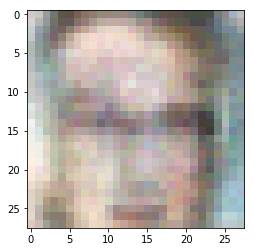

Epoch 1/1... Discriminator Loss: 0.2029... Generator Loss: 2.2273
Epoch 1/1... Discriminator Loss: 0.0736... Generator Loss: 4.7216
Epoch 1/1... Discriminator Loss: 0.1643... Generator Loss: 2.2672
Epoch 1/1... Discriminator Loss: 0.0731... Generator Loss: 4.3150
Epoch 1/1... Discriminator Loss: 0.0535... Generator Loss: 7.8048
Epoch 1/1... Discriminator Loss: 0.0141... Generator Loss: 8.8403
Epoch 1/1... Discriminator Loss: 0.2936... Generator Loss: 1.6871
Epoch 1/1... Discriminator Loss: 0.0181... Generator Loss: 9.4237
Epoch 1/1... Discriminator Loss: 0.0214... Generator Loss: 10.5626
Epoch 1/1... Discriminator Loss: 0.2019... Generator Loss: 2.5091


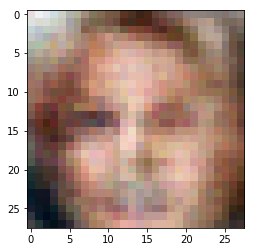

Epoch 1/1... Discriminator Loss: 0.1098... Generator Loss: 3.0923
Epoch 1/1... Discriminator Loss: 0.0545... Generator Loss: 5.0065
Epoch 1/1... Discriminator Loss: 0.0234... Generator Loss: 6.7230
Epoch 1/1... Discriminator Loss: 0.0851... Generator Loss: 4.0389
Epoch 1/1... Discriminator Loss: 0.0143... Generator Loss: 9.1059
Epoch 1/1... Discriminator Loss: 0.0237... Generator Loss: 8.4330
Epoch 1/1... Discriminator Loss: 1.5119... Generator Loss: 0.3102
Epoch 1/1... Discriminator Loss: 0.1185... Generator Loss: 2.7873
Epoch 1/1... Discriminator Loss: 0.3045... Generator Loss: 1.6166
Epoch 1/1... Discriminator Loss: 0.0439... Generator Loss: 8.6700


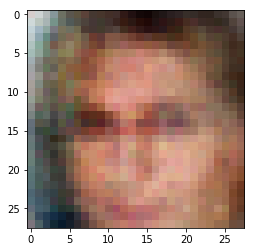

Epoch 1/1... Discriminator Loss: 0.5626... Generator Loss: 4.2823
Epoch 1/1... Discriminator Loss: 0.0365... Generator Loss: 10.6062


In [35]:
batch_size = 100
z_dim = 100
learning_rate = 0.0001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.